# Assignment 23

## Problem Statement

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [89]:
# URL of where the dataset resides
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [90]:
# Read the dataset into a dataframe
titanic = pd.read_csv(url)

In [91]:
# Display the top 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
# See the column data types and non-missing values
titanic.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
# Statistics for each column
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# I am only going to use Pclass, Sex, Age, SibSp (Siblings Aboard), Parch (Parents and Children Aboard), and Fare to determine
# if the passenger survived or not. Therefore I am going to drop the PassengerId, Name, Ticket, Cabin, and Embarked columns
# from my dataset.

titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [95]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Exploratory Data Analysis

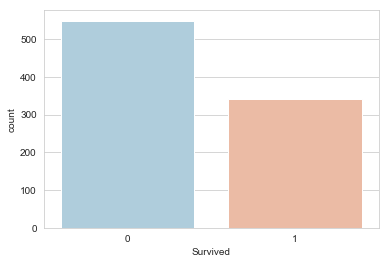

In [96]:
# Visualize how many survived and how many did not survived.
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, palette='RdBu_r')

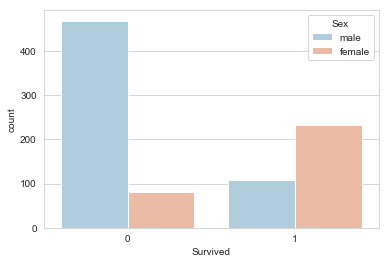

In [97]:
# Visualize how many Survived by Gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='RdBu_r')

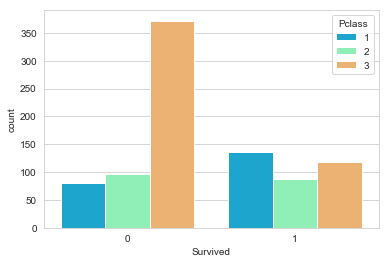

In [98]:
# Visualize how many Survived based on Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='rainbow')

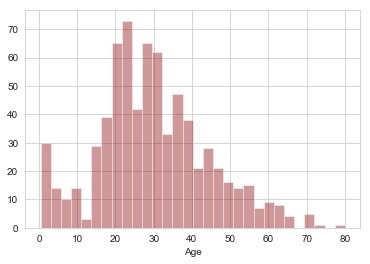

In [99]:
# Visualize the age distribution in our dataset after temporarily dropping the Null values in Age column. 
sns.distplot(titanic['Age'].dropna(), kde=False, color='darkred', bins=30)

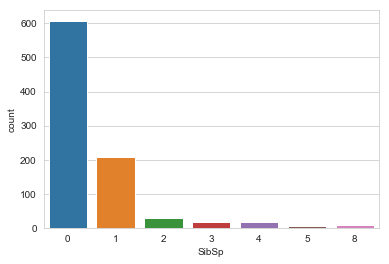

In [100]:
# Visualize the number of siblings and spouse are present in the dataset.
sns.countplot(x='SibSp', data=titanic)

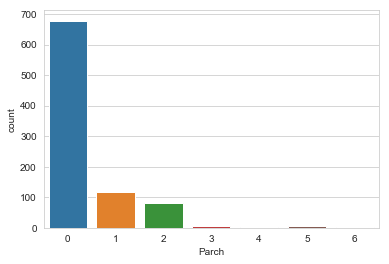

In [101]:
# Visualize the number of Parents and Childrens are present in the dataset.
sns.countplot(x='Parch', data=titanic)

## Data Cleaning

In [102]:
# Count the number of null values in the columns
titanic.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [103]:
# Looks like the Age is only column with null values. We will find the average age of the passengers based on Passenger Class.

titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [104]:
# Based on the average age by passenger class, I will create a function to replace the null values.

def impute_age_titanic(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38 
        elif Pclass == 2:
            return 30 
        else:
             return 25 
    else:
        return Age

In [105]:
# Apply the function to replace the null values in the age column by the mean values
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age_titanic,axis=1)

In [106]:
titanic.isnull().sum(axis=0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Convert categorical features

In [107]:
# We will convert Sex into dummy variables and drop one value from Sex
sex = pd.get_dummies(titanic['Sex'], drop_first=True)

In [108]:
titanic.drop(columns=['Sex'], inplace=True)

In [109]:
titanic = pd.concat([titanic, sex], axis=1)

In [110]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## Building a Decision Tree Model

### Split the data set into training set and test set

In [113]:
# Split the feature set and target set

features = titanic.drop(columns='Survived')
targets = titanic['Survived']

In [114]:
# Split the data into 70% training set and 30% test set

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [115]:
# Since the dataset is in different units ( Age = Years, Fare = Dollars), apply standard scaler to the X_train and X_test.

sc = StandardScaler()

# Transform and fit both the training and testing data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\KSamrari\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KSamrari\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\KSamrari\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KSamrari\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
# Classify the X train and Y train data and choose criterion as Entropy

classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [118]:
# Make predictions
y_pred = classifier.predict(X_test)

In [119]:
# Evaluate the model, look at the confusion matrix to see how our test data compares to the predicted data
conf_mat = confusion_matrix(y_test, y_pred)

In [120]:
conf_mat

array([[145,  12],
       [ 48,  63]], dtype=int64)

In [122]:
# Calculate the accuracy of our model

accuracy = accuracy_score(y_test, y_pred)

In [124]:
print (' Decission Tree Model Performance on the test set: Accuracy = %0.4f' % accuracy)

 Decission Tree Model Performance on the test set: Accuracy = 0.7761


In [126]:
# Compare the Test values to the Predicted values

ActualvsPred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [127]:
print(ActualvsPred.head(15))

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1
290       1          0
300       1          0
333       0          0
208       1          0
136       1          1
137       0          0
696       0          0
485       0          0
244       0          0
344       0          0


In [ ]:
# Using the given titanic data set, our Decsion Tree Machine Learning model can predict
# if the Passenger Survived or not with 78% accuracy.